<a href="https://colab.research.google.com/github/Mayvei64/The-end/blob/main/Approved_and_disapproved_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Информация о датасете

Набор данных содержит информацию, по которым принимается решение: одобрить кредит или отклонить в просьбе полчучения кредита.

Столбцы:

- person_age - возраст человека
- person_gender - пол человека (1 - man, 0 - woman)
- person_education - уровент образования
- person_income - годовой доход
- person_emp_exp - опыт работы
- person_home_ownership - статус владения жильем (например, аренда, собственное владение, ипотека)
- loan_amnt - запрашиваемая сумма кредита
- loan_intent - цель кредита
- loan_int_rate - процентная ставка по кредиту
- loan_percent_income - сумма кредита в процентах от годового дохода
- cb_person_cred_hist_length - продолжительность кредитной истории в годах
- credit_score - кредитный рейтинг человека
- previous_loan_defaults_on_file - 	индикатор предыдущих дефолтов по кредитам
- loan_status - статус одобрения кредита: 1 = одобрено; 0 = отклонено

Целевая переменная - loan_status.

Всего 14 стобцов и 45000 строк.


#Задача

Написать код, на основе которогог модель будет классифицировать людей на два типа: 1 - одобрен кредит для данного лица, 0 - не обдобрен кредит для данного лица. Другими словами, решить задачи бинароной классификации.

In [ ]:
# открываем датасет
data = pd.read_csv('loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#Анализ данных

##Название столбцов

In [ ]:
# Выведем название столбцов
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=45000, step=1)

##Проверка на пропуски

In [ ]:
# Есть ли пропуски?
data.info()

#Пропусков нет.Также можно посмотреть тип каждого переменной(признака)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

##Выведем статистическую информацию о наборе данны

In [ ]:
data.describe()

# здесь можно посмотреть количество наблюдений, среднее значение, стандартное отклонение, квартили,
# минимальное и максимальное значение для каждгого численного признакак

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#Нормализация

In [ ]:
# проведём нормализацию численных признаков, чтобы модель одинакова учитывала каждый признак
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# создадим копию датасета, чтобы не было изменений в изначальном датасете
df = pd.DataFrame(data)
df_copy = df.copy()

df_copy_new = df_copy.drop( ['person_gender','person_education',
                            'person_home_ownership', 'loan_intent',
                            'previous_loan_defaults_on_file',
                            'loan_status' ],  axis = 1)

norm_df = scaler.fit_transform(df_copy_new)
norm_df = pd.DataFrame(norm_df, columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length	', 'credit_score' ])

norm_df.head(3)
# получили нормализованные численные данные


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score
0,0.016129,0.008891,0.000,1.000000,0.727023,0.742424,0.035714,0.371739
1,0.008065,0.000595,0.000,0.014493,0.392318,0.121212,0.000000,0.247826
2,0.040323,0.000617,0.024,0.144928,0.510974,0.666667,0.035714,0.532609


## Замена категориальных значений на численные

In [ ]:
# Категориальные признака(в том числе и целевая переменная) - ['person_gender','person_education',
#                                                              'person_home_ownership', 'loan_intent',
#                                                              'previous_loan_defaults_on_file',
#                                                              'loan_status' ]

df1 = pd.DataFrame(data)
df1_copy = df1.copy()

df1_obj = df1.select_dtypes(include = ['object'])


# Функция для преобразования категориальный значений в численные
def Categorial(Df):
  arr = Df.columns

  for i in arr:
    Df[i] = Df[i].astype('category') # преобразует столбец в категорию
    Df[i] = Df[i].cat.codes # присваем численное значение

  return Df

df1_obj_int = Categorial(df1_obj)
df1_obj_int.head(3)






,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,0,4,3,4,0
1,0,3,2,1,1
2,0,3,0,3,0


In [ ]:
# Количестов людей по гендеру
df1_obj_int['person_gender'].value_counts()

# 1 - мужчины
# 0 - женщины

,count
person_gender,
1,24841
0,20159


In [ ]:
# Количество людей по дефолту кредита
df1_obj_int['previous_loan_defaults_on_file'].value_counts()

# 1 - был(и) дефолт(ы)
# 0 - не было дефолтов

,count
previous_loan_defaults_on_file,
1,22858
0,22142


# Итоговый датасет для бинароной классификации

In [ ]:
Data = pd.concat([norm_df, df1_obj_int], axis = 1) # объединяем нормальзованные переменные с категориальными
Data['loan_status'] = data['loan_status'] # добавляем целевую переменную
Data.head(3) # Итоговый датасет

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,0.016129,0.008891,0.000,1.000000,0.727023,0.742424,0.035714,0.371739,0,4,3,4,0,1
1,0.008065,0.000595,0.000,0.014493,0.392318,0.121212,0.000000,0.247826,0,3,2,1,1,0
2,0.040323,0.000617,0.024,0.144928,0.510974,0.666667,0.035714,0.532609,0,3,0,3,0,1


In [ ]:
# Количество одобренных и неодобренных кредитов
Data['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


#Что получили?

###0 - отклонено: 35000 наблюдений

###1 - одобрено: 10000 наблюдений

### Количесвто неодобренных больше в 3.5 раза, чем одобренных кредитов. По факти датасет можно считать несбалансированным. В этом случае должны прибегнуть к балансировке датасет. Если этого не сделать, то это сильно  повлиять предсказательную способность и точность модели при классификации. Но в нашем датасете классы по количеству наблюдений не сильно отличаются. Так что особых проблем по идее не должно быть.

### Удалим 25000 строк у доминурующего класса.

In [ ]:
# можно применить технику downsampling (уменьшение количества данных)

# Разделение на два датафрейма по классу
class_0 = Data.query("loan_status == 0")
class_1 = Data.query("loan_status == 1")

# Downsampling класса 0 до размера класса 1
sampled_class_0 = class_0.sample(n=len(class_1), random_state=42)

"""np.random.seed(42) устанавливает начальное число генератора случайных чисел,
чтобы результаты были воспроизводимыми."""

# Объединение двух датафреймов
balanced_df = pd.concat([sampled_class_0, class_1], ignore_index=True)

# Проверка нового распределения классов
#print(balanced_df['loan_status'].value_counts())

DF = balanced_df
DF.head(3)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,0.064516,0.009027,0.016,0.472464,0.493141,0.348485,0.178571,0.426087,1,0,0,0,1,0
1,0.024194,0.009035,0.000,0.115942,0.135802,0.090909,0.035714,0.373913,0,0,0,3,1,0
2,0.016129,0.009846,0.000,0.101449,0.117970,0.075758,0.071429,0.508696,1,0,0,0,1,0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


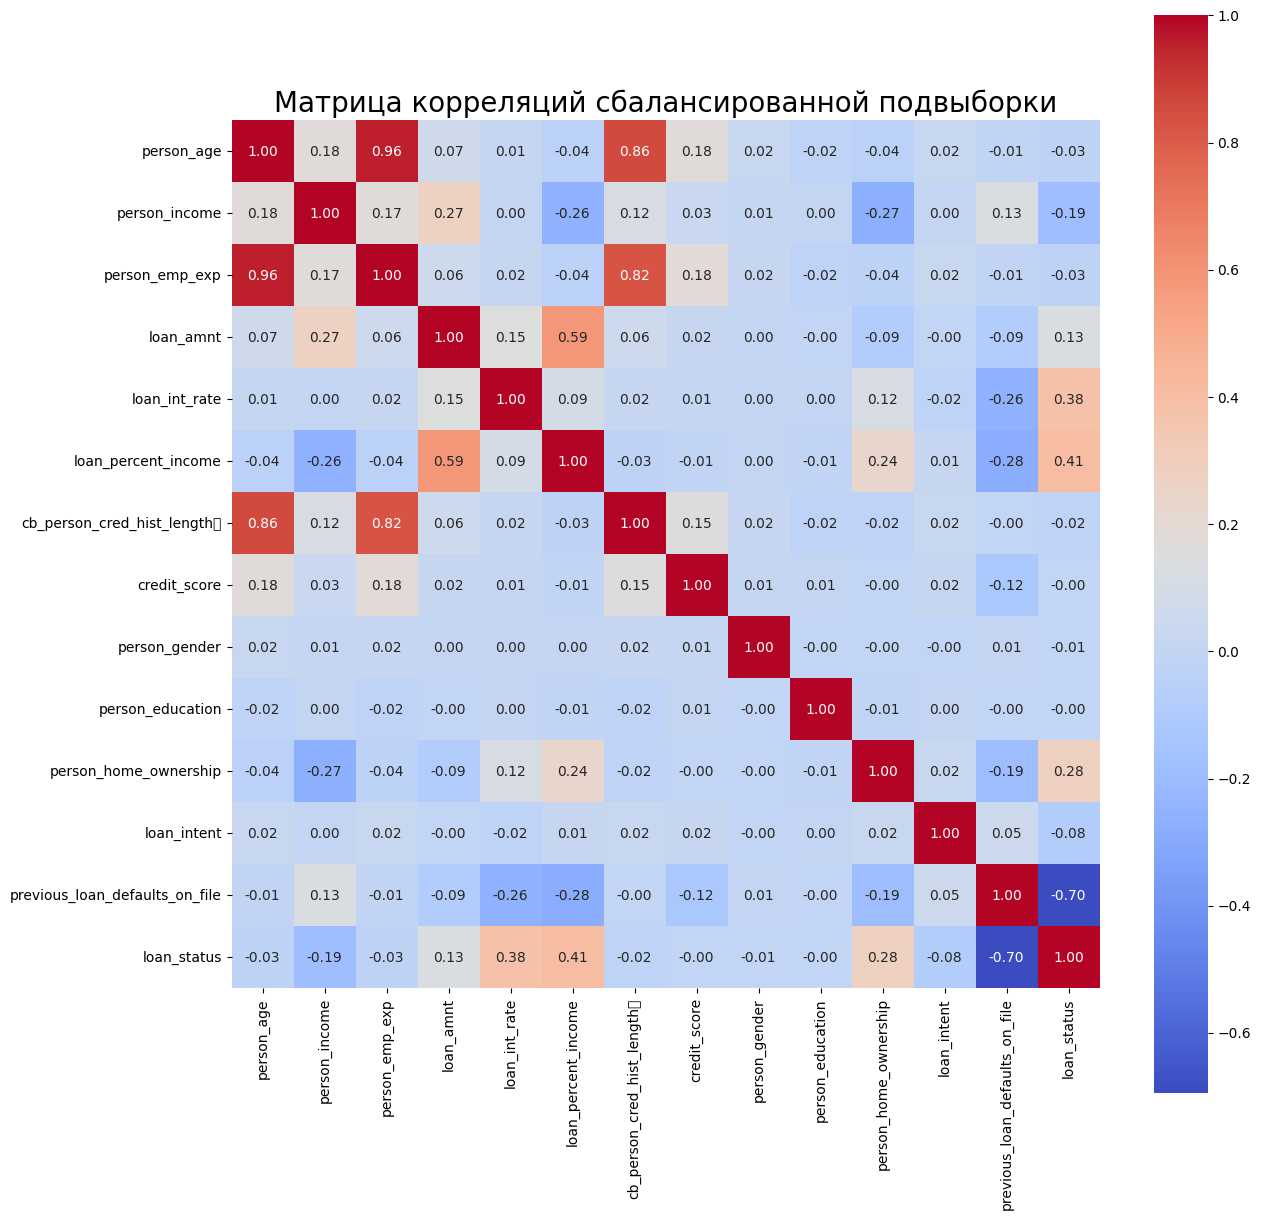

In [ ]:
# тепловая карта

corr = DF.corr()

plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляций сбалансированной подвыборки', fontsize=20)
plt.show()

###Классы уравновешены.Теперь можно приступать к классификации.

#Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = DF.drop(['loan_status'], axis = 1)
y = DF['loan_status']

print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (20000, 13) | y shape: (20000,) 


Точность модели: 0.87925

Accuracy: 0.87925
Precision: 0.8442095588235294
Recall: 0.9273094396769308
F1 score: 0.8838104402213135


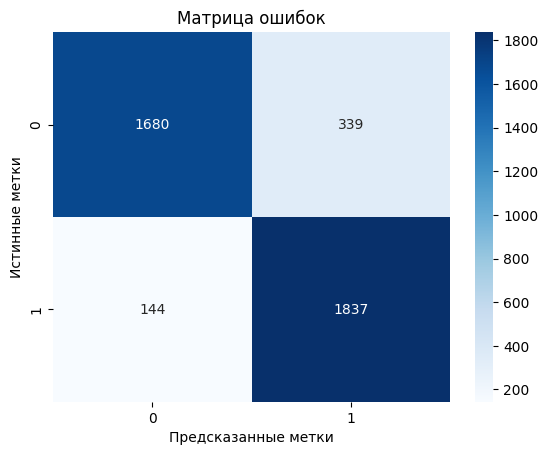

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта классификатора логистической регрессии
clf = LogisticRegression(random_state=42)

# Обучение модели
clf.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_log = clf.predict(X_test)


# Вычислим различные метрики
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Оценка точности модели
print(f'Точность модели: {clf.score(X_test, y_test)}')
print()
# Выведем результаты
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 score:", f1_log)

# Построение матрицы ошибок
cm_log = confusion_matrix(y_test, y_pred_log)

# Визуализация матрицы ошибок
sns.heatmap(cm_log, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


#################################################### можно ещё ROC кривую построить


### попытаемся с помощью методы главных компонент(PCA) построить разделяющую прямую

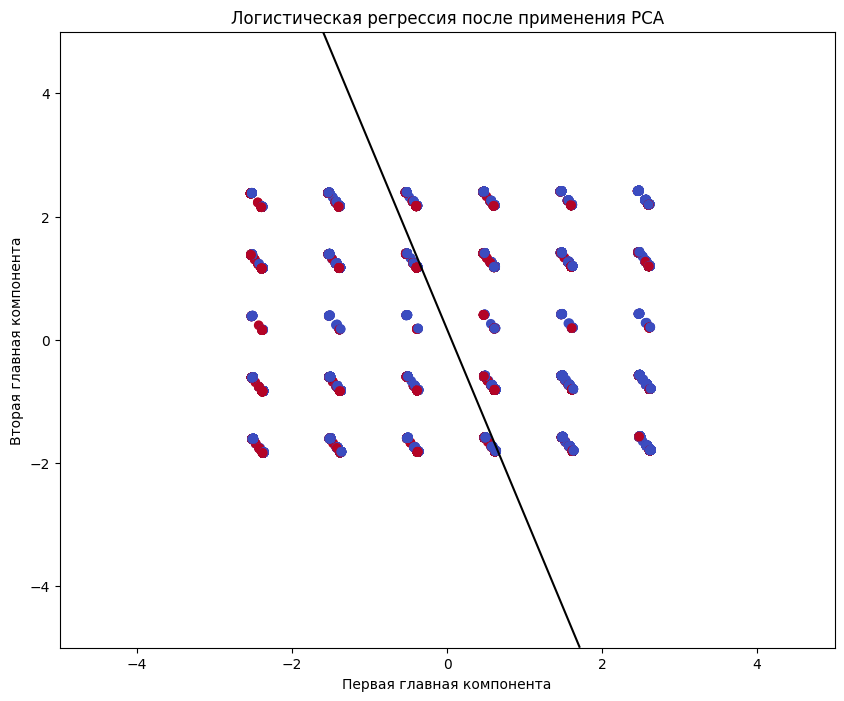

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

intercept = logreg.intercept_[0]
coef = logreg.coef_.ravel()

# Создадим сетку значений для построения линии
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Вычислим значения функции на сетке
Z = intercept + coef[0]*xx + coef[1]*yy

plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles=['-'])

# Отобразим точки обучающего набора
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.title('Логистическая регрессия после применения PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

#Метод опорных векторов(SVM)

Точность модели: 0.8698484848484849

Accuracy: 0.8698484848484849
Precision: 0.8180379746835443
Recall: 0.9483338428615102
F1 score: 0.8783802916607674


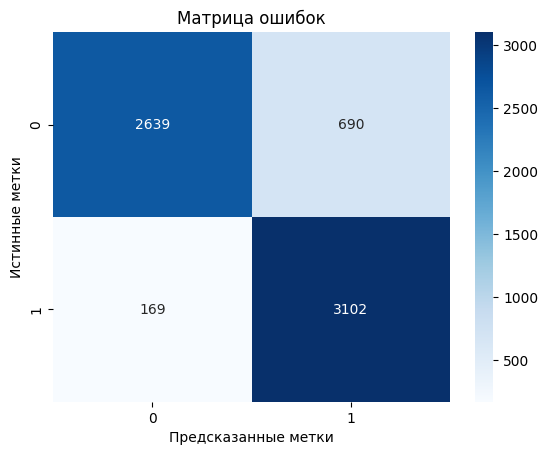

In [ ]:
from sklearn.svm import SVC
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Создание и обучение модели SVM с RBF ядром
svm = SVC(kernel='rbf', gamma='auto', C=1.0)
svm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_svm = svm.predict(X_test)

# Оценка точности модели
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


print(f'Точность модели: {svm.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 score:", f1_svm)

# Построение матрицы ошибок
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Визуализация матрицы ошибок
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Деревья решений

Точность модели: 0.8715151515151515

Accuracy: 0.8715151515151515
Precision: 0.8296598639455782
Recall: 0.93213084683583
F1 score: 0.8779153469622805


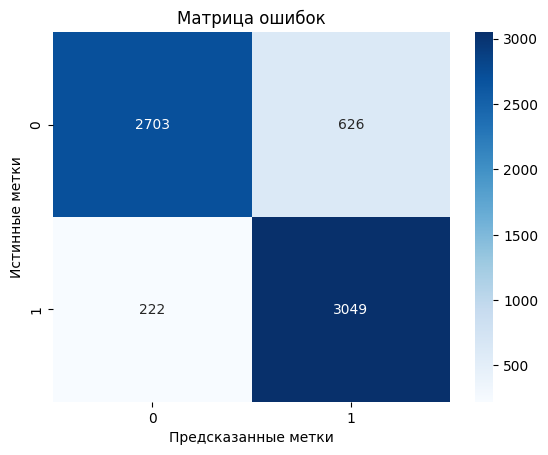

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Создание и обучение модели дерева решений
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_tree = dtc.predict(X_test)

# Оценка точности модели
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f'Точность модели: {dtc.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 score:", f1_tree)

# Построение матрицы ошибок
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Визуализация матрицы ошибок
sns.heatmap(cm_tree, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Случайный лес

Точность модели: 0.90325

Accuracy: 0.90325
Precision: 0.8876459143968871
Recall: 0.9212518929833418
F1 score: 0.9041367351994055


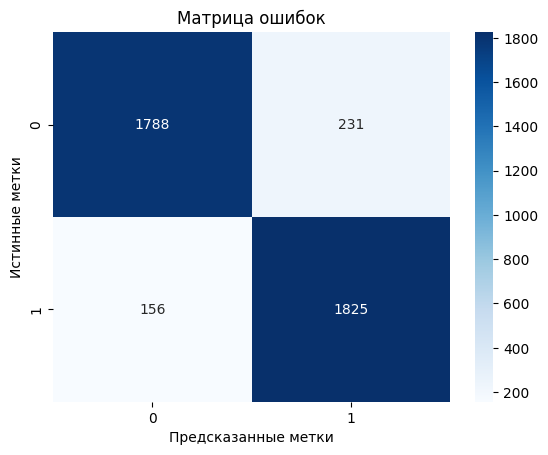

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_RandF = rf_model.predict(X_test)

# Оценка точности модели
accuracy_RandF = accuracy_score(y_test, y_pred_RandF)
precision_RandF = precision_score(y_test, y_pred_RandF)
recall_RandF = recall_score(y_test, y_pred_RandF)
f1_RandF = f1_score(y_test, y_pred_RandF)

print(f'Точность модели: {rf_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_RandF)
print("Precision:", precision_RandF)
print("Recall:", recall_RandF)
print("F1 score:", f1_RandF)

# Построение матрицы ошибок
cm_RandF = confusion_matrix(y_test, y_pred_RandF)

# Визуализация матрицы ошибок
sns.heatmap(cm_RandF, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Градиентный бустинг (Gradient Boosting)

Точность модели: 0.902

Accuracy: 0.902
Precision: 0.882522869523351
Recall: 0.9252902574457345
F1 score: 0.9034006899950715


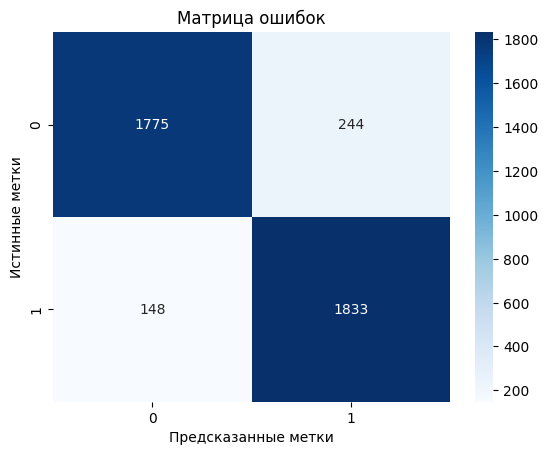

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_gb = gb_model.predict(X_test)

# Оценка точности модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f'Точность модели: {gb_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 score:", f1_gb)

# Построение матрицы ошибок
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Визуализация матрицы ошибок
sns.heatmap(cm_gb, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


# K-ближайших соседей (k-Nearest Neighbors, KNN)

Точность модели: 0.86125

Accuracy: 0.86125
Precision: 0.8467898832684825
Recall: 0.8788490661282181
F1 score: 0.8625216745107753


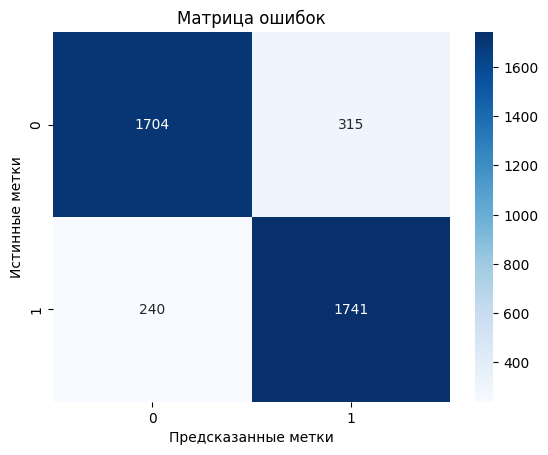

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_knn = knn_model.predict(X_test)

# Оценка точности модели
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f'Точность модели: {knn_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)

# Построение матрицы ошибок
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Визуализация матрицы ошибок
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


# Гаусовский наивный байес(GNB)

Точность модели: 0.82925

Accuracy: 0.82925
Precision: 0.7456472369417109
Recall: 0.99444724886421
F1 score: 0.8522604369457063


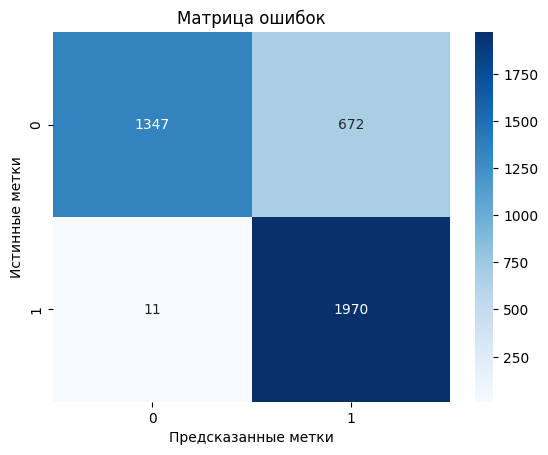

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_NB = nb_model.predict(X_test)

# Оценка точности модели
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

print(f'Точность модели: {nb_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("F1 score:", f1_NB)

# Построение матрицы ошибок
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Визуализация матрицы ошибок
sns.heatmap(cm_NB, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()




# Нейоронный сети

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

"""
# Преобразование меток в категориальные
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Определение архитектуры нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

# Компилирование модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test_cat))

# Прогнозирование на тестовых данных
y_pred_neuro = model.predict_classes(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_neuro)
print(f'Accuracy: {accuracy:.2f}')
"""

# Создание модели
model_n = Sequential()
model_n.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_n.add(Dense(32, activation='relu'))
model_n.add(Dense(16, activation='relu'))
model_n.add(Dense(1, activation='sigmoid'))  # последний слой с функцией активации sigmoid

# Компиляция модели
model_n.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model_n.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model_n.evaluate(X_test, y_test)
print()
print(f'Тестовая точность: {test_acc:.2f}')
print()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7642 - loss: 0.4574 - val_accuracy: 0.8637 - val_loss: 0.2951
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.2919 - val_accuracy: 0.8737 - val_loss: 0.2731
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.2830 - val_accuracy: 0.8742 - val_loss: 0.2741
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8707 - loss: 0.2743 - val_accuracy: 0.8733 - val_loss: 0.2702
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8684 - loss: 0.2752 - val_accuracy: 0.8790 - val_loss: 0.2608
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8745 - loss: 0.2666 - val_accuracy: 0.8658 - val_loss: 0.2812
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8718 - loss: 0.2684 - val_accuracy: 0.8733 - val_loss: 0.2702
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8735 - loss: 0.2719 - val_accuracy: 0.8767 - val_